# Portland Vs Portland

#### Beth Brown
#### January 15, 2021

## 1. Introduction
The prevalence of telecommuting and working from home is growing quickly. Because of this, many people are seeking to relocate since they are no longer tied to the location of a company's offices. They will consider many factors in their decision to relocate. 
<br> <br>
The two coastal cities Portland, Oregon, and Portland, Maine, share a name, but how much more do they have in common? The population of Portland, Oregon, is approximately ten times greater than the population of Portland, Maine. They are separated by approximately 2,500 miles - 45 hours by car or ten to twelve hours by commercial flight. In this report, I will compare the two cities in two key areas: population demographics and recreational opportunities. The final report will provide the reader with information that will help them decide which city is best suited for them.

In [1]:
# install and import things
#!pip install folium
#!pip install geopy
from bs4 import BeautifulSoup 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from pandas import json_normalize
from folium.features import DivIcon
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import requests
import urllib
import folium
import json
pd.set_option('display.max_columns',None)

In [2]:
# get latitude and longitude for each city
OR_address = 'Portland, Oregon'
geolocator = Nominatim(user_agent="ny_explorer")
OR_location = geolocator.geocode(OR_address)
OR_latitude = OR_location.latitude
OR_longitude = OR_location.longitude

ME_address = 'Portland, Maine'
ME_location = geolocator.geocode(ME_address)
ME_latitude = ME_location.latitude
ME_longitude = ME_location.longitude

# determine the midpoint for centering the map
Mid_latitude = (ME_latitude + OR_latitude)/2
Mid_longitude = (ME_longitude + OR_longitude)/2

# make a map of the US with markers for each Portland
zoom=4
US_map = folium.Map(location=[Mid_latitude, Mid_longitude], zoom_start=zoom, no_touch=True, min_zoom=zoom, max_zoom=zoom,
                   zoom_control=False)
folium.Marker([OR_latitude, OR_longitude]).add_to(US_map)
folium.Marker([OR_latitude, OR_longitude], 
              icon=DivIcon(icon_size=(200,150),icon_anchor=(60,10),
                           html='<h4>Portland, Oregon</h4>')
             ).add_to(US_map)
folium.Marker([ME_latitude, ME_longitude]).add_to(US_map)
folium.Marker([ME_latitude, ME_longitude], 
              icon=DivIcon(icon_size=(200,150),icon_anchor=(60,10),
                           html='<h4>Portland, Maine</h4>')
             ).add_to(US_map)
US_map



## 2. Data

Data sources for this project will include the United States Census Bureau and Foursquare.

### 2.1 The United States Census Bureau

The Census Bureau provides a variety of demographic information collected through the American Community Survey. Selected data for the two Portlands is shown below.

In [3]:
# Census data for Portland, OR, and Portland, ME:
census_key='e53ba2a2cec0067578ae6768636a64b4c4f04e0b'

census_variables = {'S0101_C01_001E' : 'Total Population',
                    'S0101_C01_002E' : 'Under 5 yrs',
                    'S0101_C01_003E' : '5 to 9 yrs',
                    'S0101_C01_004E' : '10 to 14 yrs',
                    'S0101_C01_005E' : '15 to 19 yrs',
                    'S0101_C01_006E' : '20 to 24 yrs',
                    'S0101_C01_007E' : '25 to 29 yrs',
                    'S0101_C01_008E' : '30 to 34 yrs',
                    'S0101_C01_009E' : '35 to 39 yrs',
                    'S0101_C01_010E' : '40 to 44 yrs',
                    'S0101_C01_011E' : '45 to 49 yrs',
                    'S0101_C01_012E' : '50 to 54 yrs',
                    'S0101_C01_013E' : '55 to 59 yrs',
                    'S0101_C01_014E' : '60 to 64 yrs',
                    'S0101_C01_015E' : '65 to 69 yrs',
                    'S0101_C01_016E' : '70 to 74 yrs',
                    'S0101_C01_017E' : '75 to 79 yrs',
                    'S0101_C01_018E' : '80 to 84 yrs',
                    'S0101_C01_019E' : 'over 85 yrs',
                    'S0102_C01_006E' : 'Race: White',
                    'S0102_C01_007E' : 'Race: Black or African American',
                    'S0102_C01_008E' : 'Race: American Indian or Alaskan Native',
                    'S0102_C01_009E' : 'Race: Asian',
                    'S0102_C01_010E' : 'Race: Native Hawaiian or Other Pacific Islander',
                    'S0102_C01_011E' : 'Race: Other',
                    'S0102_C01_012E' : 'Race: Multiple',
                    'S0102_C01_013E' : 'Race: Hispanic or Latino - Any race',
                    'S0102_C01_037E' : 'Education: Bachelors degree or higher',
                    'S0102_C01_087E' : 'Population below poverty level'}

ME_place='60545'
ME_state='23'

OR_place='59000'
OR_state='41'

# load all data for 2019

ME_url='https://api.census.gov/data/2019/acs/acs5/subject?get=NAME,S0101_C01_001E,S0101_C01_002E,S0101_C01_003E,\
S0101_C01_004E,S0101_C01_005E,S0101_C01_006E,S0101_C01_007E,S0101_C01_008E,S0101_C01_009E,S0101_C01_010E,\
S0101_C01_011E,S0101_C01_012E,S0101_C01_013E,S0101_C01_014E,S0101_C01_015E,S0101_C01_016E,S0101_C01_017E,\
S0101_C01_018E,S0101_C01_019E,S0102_C01_006E,S0102_C01_007E,S0102_C01_008E,S0102_C01_009E,S0102_C01_010E,\
S0102_C01_011E,S0102_C01_012E,S0102_C01_013E,S0102_C01_037E,S0102_C01_087E\
&for=place:'+ME_place+'&in=state:'+ME_state+'&key='+census_key

ME_data=pd.read_json(ME_url)

OR_url='https://api.census.gov/data/2019/acs/acs5/subject?get=NAME,S0101_C01_001E,S0101_C01_002E,S0101_C01_003E,\
S0101_C01_004E,S0101_C01_005E,S0101_C01_006E,S0101_C01_007E,S0101_C01_008E,S0101_C01_009E,S0101_C01_010E,\
S0101_C01_011E,S0101_C01_012E,S0101_C01_013E,S0101_C01_014E,S0101_C01_015E,S0101_C01_016E,S0101_C01_017E,\
S0101_C01_018E,S0101_C01_019E,S0102_C01_006E,S0102_C01_007E,S0102_C01_008E,S0102_C01_009E,S0102_C01_010E,\
S0102_C01_011E,S0102_C01_012E,S0102_C01_013E,S0102_C01_037E,S0102_C01_087E\
&for=place:'+OR_place+'&in=state:'+OR_state+'&key='+census_key

OR_data=pd.read_json(OR_url)

# create dataframe for with data from both cities

Portland_data=ME_data.append(OR_data.iloc[1])


In [4]:
# load population data for 2010-2019
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

ME_population=[]
OR_population=[]

for year in years:
    ME_url='https://api.census.gov/data/'+year+'/acs/acs5/subject?get=S0101_C01_001E&for=place:'+ME_place+\
    '&in=state:'+ME_state+'&key='+census_key
    OR_url='https://api.census.gov/data/'+year+'/acs/acs5/subject?get=S0101_C01_001E&for=place:'+OR_place+\
    '&in=state:'+OR_state+'&key='+census_key
    
    ME_result=pd.read_json(ME_url)
    OR_result=pd.read_json(OR_url)
    
    ME_population.append(ME_result.iloc[1,0])
    OR_population.append(OR_result.iloc[1,0])

In [5]:
population_data=pd.DataFrame([years,ME_population,OR_population]).T
population_data.rename(columns={0:'Year',1:'Portland, Maine',2:'Portland, Oregon'},inplace=True)
population_data.set_index('Year',inplace=True)
population_data

,"Portland, Maine","Portland, Oregon"
Year,,
2010,66138,566686
2011,66240,576543
2012,66235,585888
2013,66227,594687
2014,66317,602568
2015,66490,612206
2016,66649,620589
2017,66715,630331
2018,66735,639387


In [23]:
# create dataframe for with data from both cities

Portland_data=ME_data.append(OR_data.iloc[1]).reset_index(drop=True)

# replace column names with variable descriptions and transpose
Portland_data.columns=Portland_data.iloc[0]
Portland_data.drop(index=0,inplace=True)
Portland_data=Portland_data.rename(columns=census_variables).T
Portland_data=Portland_data.rename(columns={1:'Portland, Maine',2:'Portland, Oregon'}).drop(index=['NAME'])
Portland_data.index.rename('',inplace=True)
Portland_data.drop(index=['place','state'],inplace=True)


### 2.2 Foursquare

Foursquare provides data on businesses and other venues in cities and towns. For example, Foursquare can be used to determine the five most common types of restaurant in a community, as shown below.

In [7]:
# Foursquare credentials
CLIENT_ID = 'CUGM1DGKBIM4FSUB4V20QNBMB1Y55IVBM2DWDABF1540BLCP' 
CLIENT_SECRET = 'U3RCUGOO4QJ5W5CMYAOAFRT34VNQ0T5KRJMQ4JSD0MKSSHXC' 
ACCESS_TOKEN = 'THNQFZIQ4IZC4GZNYD4SFFKMUPYMAL1TG1W21ZEFC4ZTYNPP' 
VERSION = '20180604'
LIMIT = 1000

# build query
search_query = 'Restaurant'
ME_radius = 7000
OR_radius = 11000
# a list of food categories
categories = ['503288ae91d4c4b30a586d67','4bf58dd8d48988d1c8941735','4bf58dd8d48988d14e941735','4bf58dd8d48988d142941735',\
              '56aa371be4b08b9a8d573568','52e81612bcbc57f1066b7a03','4bf58dd8d48988d145941735','4eb1bd1c3b7b55596b4a748f',\
              '52e81612bcbc57f1066b79fb','4deefc054765f83613cdba6f','4bf58dd8d48988d111941735','4bf58dd8d48988d113941735',\
              '4bf58dd8d48988d156941735','4eb1d5724b900d56c88a45fe','4bf58dd8d48988d1d1941735','56aa371be4b08b9a8d57350e',\
              '4bf58dd8d48988d149941735','52af39fb3cf9994f4e043be9','4bf58dd8d48988d14a941735','4bf58dd8d48988d169941735',\
              '52e81612bcbc57f1066b7a01','4bf58dd8d48988d1df931735','5e179ee74ae8e90006e9a746','52e81612bcbc57f1066b7a02',\
              '52e81612bcbc57f1066b79f1','4bf58dd8d48988d16c941735','4bf58dd8d48988d128941735','4bf58dd8d48988d16d941735',\
              '4bf58dd8d48988d17a941735','4bf58dd8d48988d144941735','4bf58dd8d48988d154941735','5293a7d53cf9994f4e043a45',\
              '52e81612bcbc57f1066b7a00','52e81612bcbc57f1066b79f2','52f2ae52bcbc57f1066b8b81','4bf58dd8d48988d147941735',\
              '4bf58dd8d48988d108941735','5744ccdfe4b0c0459246b4d0','4bf58dd8d48988d109941735','52e81612bcbc57f1066b7a05',\
              '4bf58dd8d48988d10b941735','4bf58dd8d48988d16e941735','4edd64a0c7ddd24ca188df1a','52e81612bcbc57f1066b7a09',\
              '4bf58dd8d48988d10c941735','4d4ae6fc7a7b7dea34424761','4bf58dd8d48988d155941735','4bf58dd8d48988d10d941735',\
              '4bf58dd8d48988d10e941735','52e81612bcbc57f1066b79ff','52e81612bcbc57f1066b79fe','4bf58dd8d48988d16f941735',\
              '52e81612bcbc57f1066b79fa','4bf58dd8d48988d10f941735','52e81612bcbc57f1066b7a06','4bf58dd8d48988d110941735',\
              '52e81612bcbc57f1066b79fd','5283c7b4e4b094cb91ec88d7','4bf58dd8d48988d1be941735','4bf58dd8d48988d1cd941735',\
              '4bf58dd8d48988d107941735','4bf58dd8d48988d16b941735','58daa1558bbb0b01f18ec1f4','4eb1bfa43b7b52c0e1adc2e8',\
              '56aa371be4b08b9a8d573558','4bf58dd8d48988d1bf941735','4bf58dd8d48988d1c0941735','4bf58dd8d48988d1c3941735',\
              '4bf58dd8d48988d1c1941735','4bf58dd8d48988d115941735','5bae9231bedf3950379f89e1','5bae9231bedf3950379f89e7',\
              '56aa371be4b08b9a8d573529','5744ccdfe4b0c0459246b4ca','58daa1558bbb0b01f18ec1cd','52e81612bcbc57f1066b79f7',\
              '5bae9231bedf3950379f89e4','5bae9231bedf3950379f89da','5bae9231bedf3950379f89ea','52e81612bcbc57f1066b79f9',\
              '4bf58dd8d48988d1c2941735','52e81612bcbc57f1066b79f8','4bf58dd8d48988d1c4941735','5293a7563cf9994f4e043a44',\
              '4bf58dd8d48988d1bd941735','4bf58dd8d48988d1c5941735','4bf58dd8d48988d1c6941735','5744ccdde4b0c0459246b4a3',\
              '4bf58dd8d48988d1ce941735','56aa371be4b08b9a8d57355a','4bf58dd8d48988d14f941735','4bf58dd8d48988d150941735',\
              '5413605de4b0ae91d18581a9','4bf58dd8d48988d1cc941735','4bf58dd8d48988d158941735','4bf58dd8d48988d1dc931735',\
              '56aa371be4b08b9a8d573538','4f04af1f2fb6e1c99f3db0bb','52e928d0bcbc57f1066b7e96','4bf58dd8d48988d1d3941735',\
              '4bf58dd8d48988d14c941735'] 

# start dataframes
ME_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'\
.format(CLIENT_ID,CLIENT_SECRET,ME_latitude,ME_longitude,VERSION,search_query,ME_radius,LIMIT,'4d4b7105d754a06374d81259')
OR_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'\
.format(CLIENT_ID,CLIENT_SECRET,OR_latitude,OR_longitude,VERSION,search_query,OR_radius,LIMIT,'4d4b7105d754a06374d81259')
    
# get the data
ME_result=requests.get(ME_url).json()
OR_result=requests.get(OR_url).json()
    
# normalize results
ME_restaurants=pd.DataFrame(json_normalize(ME_result['response']['venues']))
OR_restaurants=pd.DataFrame(json_normalize(OR_result['response']['venues']))


In [8]:
for category in categories:   
    ME_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'\
    .format(CLIENT_ID,CLIENT_SECRET,ME_latitude,ME_longitude,VERSION,search_query,ME_radius,LIMIT,category)
    OR_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'\
    .format(CLIENT_ID,CLIENT_SECRET,OR_latitude,OR_longitude,VERSION,search_query,OR_radius,LIMIT,category)
    
    # get the data
    ME_result=requests.get(ME_url).json()
    OR_result=requests.get(OR_url).json()
    
    # normalize results
    ME_group=pd.DataFrame(json_normalize(ME_result['response']['venues']))
    OR_group=pd.DataFrame(json_normalize(OR_result['response']['venues']))

    # add to dataframes
    ME_restaurants=ME_restaurants.append(ME_group)
    OR_restaurants=OR_restaurants.append(OR_group)  

In [9]:
# remove duplicates
ME_restaurants.drop_duplicates(subset=['id'],inplace=True)
OR_restaurants.drop_duplicates(subset=['id'],inplace=True)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in ME_restaurants.columns if col.startswith('location.')] + ['id']
ME_restaurants = ME_restaurants.loc[:, filtered_columns]
OR_restaurants = OR_restaurants.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
ME_restaurants['categories'] = ME_restaurants.apply(get_category_type, axis=1)
OR_restaurants['categories'] = OR_restaurants.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ME_restaurants.columns = [column.split('.')[-1] for column in ME_restaurants.columns]
OR_restaurants.columns = [column.split('.')[-1] for column in OR_restaurants.columns]


In [10]:
ME_food=pd.DataFrame(ME_restaurants['categories'].value_counts()).reset_index()
OR_food=pd.DataFrame(OR_restaurants['categories'].value_counts()).reset_index()

In [11]:
ME_top5_food=ME_food.head()
OR_top5_food=OR_food.head()
top5_food=pd.DataFrame([1,2,3,4,5],columns=['Rank'])
top5_food.insert(loc=1,column='Portland, Oregon',value=OR_top5_food['index'])
top5_food.insert(loc=2,column='Portland, Maine',value=ME_top5_food['index'])
top5_food.set_index('Rank',inplace=True)
top5_food

,"Portland, Oregon","Portland, Maine"
Rank,,
1,Chinese Restaurant,American Restaurant
2,Mexican Restaurant,Italian Restaurant
3,American Restaurant,Seafood Restaurant
4,Thai Restaurant,Thai Restaurant
5,Sushi Restaurant,Restaurant


## 3. Methodology
The Census Bureau performs statistical analysis on the census data. Because of this, little statistical analysis is required here. Pandas dataframes are used extensively to manage the data and determine rankings. Matplotlib is used to create charts and graphs demonstrating the differences between the two Portlands.

## 4. Discussion

### 4.1 Population Demographics


In [12]:
# line graph of age demographics (percent)
# make age demographics dataframe
age_data=pd.DataFrame(Portland_data[0:19])
# convert to percentages
age_data_percent = age_data.reset_index(drop=True)
age_data_percent['Portland, Maine'] = pd.to_numeric(age_data_percent['Portland, Maine'])
age_data_percent['Portland, Oregon'] = pd.to_numeric(age_data_percent['Portland, Oregon'])
age_data_percent = age_data_percent.transform(lambda x : x/x.max()*100)
age_data_percent.insert(0,'label',age_data.index)
age_data_percent.set_index('label',inplace=True)
age_data_percent.rename_axis('',inplace=True)
age_data_percent.drop('Total Population',inplace=True)

In [13]:
def draw_age_chart():
    # make the charts

    fig_age, fig_ax=plt.subplots()

    labels=age_data_percent.index
    ME_age=age_data_percent['Portland, Maine']
    OR_age=age_data_percent['Portland, Oregon']

    fig_ax.plot(labels,OR_age,label='Portland, Oregon',ls='dashed',color='purple')
    fig_ax.plot(labels,ME_age,label='Portland, Maine',ls='dotted',color='black')
    fig_ax.legend()
    fig_ax.set_title('Age Distribution',fontsize='xx-large')
    fig_ax.tick_params(axis='x',labelrotation=75)

    fig_ax.set_xlabel('Age Group',size='x-large')
    fig_ax.set_ylabel('Portion of Population (%)',size='x-large')

def draw_race_charts():
    # bar charts of racial demographics
    fig_race, (axs_race1,axs_race2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    race_data=pd.DataFrame(Portland_data[19:26])

    # Racial Breakdown

    labels1=['White','Black or \nAfrican American','American Indian or \nAlaskan Native','Asian',\
            'Native Hawaiian or \nOther Pacific Islander','Other','Multiple Races']
    OR_race=race_data['Portland, Oregon'].to_numpy(dtype='float64')
    ME_race=race_data['Portland, Maine'].to_numpy(dtype='float64')

    x=np.arange(len(labels1))
    width=0.35

    OR_rects=axs_race1.bar(x-width/2,OR_race,width,label='Portland, Oregon',color='#74c0f7')
    ME_rects=axs_race1.bar(x+width/2,ME_race,width,label='Portland, Maine',color='#fcb755')
    axs_race1.legend()
    axs_race1.set_xlabel('Race',size='x-large')
    axs_race1.set_ylabel('Portion of Population (%)',size='x-large')
    axs_race1.set_title('Racial Distribution',fontsize='xx-large')
    axs_race1.set_xticks(x)
    axs_race1.set_xticklabels(labels1)
    axs_race1.tick_params(axis='x',labelrotation=75,length=0)

    # Non-white racial distribution

    labels2=['Black or \nAfrican American','American Indian or \nAlaskan Native','Asian',\
            'Native Hawaiian or \nOther Pacific Islander','Other','Multiple Races']
    OR_non_white=np.delete(OR_race,(0),axis=0)
    ME_non_white=np.delete(ME_race,(0),axis=0)

    x=np.arange(len(labels2))
    width=0.35

    OR_rects2=axs_race2.bar(x-width/2,OR_non_white,width,label='Portland, Oregon',color='#74c0f7')
    ME_rects2=axs_race2.bar(x+width/2,ME_non_white,width,label='Portland, Maine',color='#fcb755')
    axs_race2.legend()
    axs_race2.set_xlabel('Race',size='x-large')
    axs_race2.set_ylabel('Portion of Population (%)',size='x-large')
    axs_race2.set_title('Non-White Racial Distribution',fontsize='xx-large')
    axs_race2.set_xticks(x)
    axs_race2.set_xticklabels(labels2)
    axs_race2.tick_params(axis='x',labelrotation=75,length=0)

def draw_heritage_charts():   
    # Hispanic heritage
    fig_hispanic, (axs_hispanic1,axs_hispanic2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    OR_hispanic=Portland_data.astype('float32').at['Race: Hispanic or Latino - Any race','Portland, Oregon']
    ME_hispanic=Portland_data.astype('float32').at['Race: Hispanic or Latino - Any race','Portland, Maine']
    OR_data=[OR_hispanic,(100-OR_hispanic)]
    ME_data=[ME_hispanic,(100-ME_hispanic)]
    OR_labels=['Hispanic or Latino\n'+f'{OR_data[0]:.1f}'+'%','Not Hispanic or Latino\n'+f'{OR_data[1]:.1f}'+'%']
    ME_labels=['Hispanic or Latino\n'+f'{ME_data[0]:.1f}'+'%','Not Hispanic or Latino\n'+f'{ME_data[1]:.1f}'+'%']
    explode=(0.1,0)

    axs_hispanic1.set_title('Hispanic Heritage\n Portland, Oregon',size='xx-large')
    axs_hispanic2.set_title('Hispanic Heritage\n Portland, Maine',size='xx-large')

    axs_hispanic1.pie(OR_data,explode=explode,labels=OR_labels,startangle=135,colors=['#74c0f7','#fcb755'])
    axs_hispanic2.pie(ME_data,explode=explode,labels=ME_labels,startangle=135,colors=['#74c0f7','#fcb755'])

def draw_education_charts():
    # Education
    fig_education, (axs_education1,axs_education2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    OR_education=Portland_data.astype('float32').at['Education: Bachelors degree or higher','Portland, Oregon']
    ME_education=Portland_data.astype('float32').at['Education: Bachelors degree or higher','Portland, Maine']
    OR_data=[OR_education,(100-OR_education)]
    ME_data=[ME_education,(100-ME_education)]
    OR_labels=['Bachelors degree or higher\n'+f'{OR_data[0]:.1f}'+'%','Less than Bachelors Degree\n'+f'{OR_data[1]:.1f}'+'%']
    ME_labels=['Bachelors degree or higher\n'+f'{ME_data[0]:.1f}'+'%','Less than Bachelors Degree\n'+f'{ME_data[1]:.1f}'+'%']
    explode=(0.1,0)

    axs_education1.set_title('Education\n Portland, Oregon',size='xx-large')
    axs_education2.set_title('Education\n Portland, Maine',size='xx-large')

    axs_education1.pie(OR_data,explode=explode,labels=OR_labels,startangle=45,colors=['#74c0f7','#fcb755'])
    axs_education2.pie(ME_data,explode=explode,labels=ME_labels,startangle=45,colors=['#74c0f7','#fcb755'])

def draw_poverty_charts():    
    # Poverty
    fig_poverty, (axs_poverty1,axs_poverty2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

    OR_poverty=Portland_data.astype('float32').at['Population below poverty level','Portland, Oregon']
    ME_poverty=Portland_data.astype('float32').at['Population below poverty level','Portland, Maine']
    OR_data=[OR_poverty,(100-OR_poverty)]
    ME_data=[ME_poverty,(100-ME_poverty)]
    OR_labels=['Below poverty level\n'+f'{OR_data[0]:.1f}'+'%','Above poverty level\n'+f'{OR_data[1]:.1f}'+'%']
    ME_labels=['Below poverty level\n'+f'{ME_data[0]:.1f}'+'%','Above poverty level\n'+f'{ME_data[1]:.1f}'+'%']
    explode=(0.1,0)

    axs_poverty1.set_title('Poverty Level\n Portland, Oregon',size='xx-large')
    axs_poverty2.set_title('Poverty Level\n Portland, Maine',size='xx-large')

    axs_poverty1.pie(OR_data,explode=explode,labels=OR_labels,startangle=135,colors=['#74c0f7','#fcb755'])
    axs_poverty2.pie(ME_data,explode=explode,labels=ME_labels,startangle=135,colors=['#74c0f7','#fcb755'])

def draw_growth_charts():
    # Population growth
    fig_growth, (axs_growth1,axs_growth2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    
    labels=population_data.index
    OR_data=population_data['Portland, Oregon'].to_numpy(dtype='float64') / 1000
    ME_data=population_data['Portland, Maine'].to_numpy(dtype='float64') / 1000

    axs_growth1.plot(labels,OR_data)
    axs_growth1.set_title('Population Growth\n Portland, Oregon',fontsize='xx-large')
    axs_growth1.set_xlabel('Year',size='x-large')
    axs_growth1.set_ylabel('Population (in thousands)',size='x-large')
    axs_growth1.set_yticks([570,590,610,630,650])

    axs_growth2.plot(labels,ME_data)
    axs_growth2.set_title('Population Growth\n Portland, Maine',fontsize='xx-large')
    axs_growth2.set_xlabel('Year',size='x-large')
    axs_growth2.set_ylabel('Population (in thousands)',size='x-large')
    axs_growth2.set_yticks([66.0,66.2,66.4,66.6,66.8])

In 2019, the population of Portland, Oregon, was 645,291. The population of Portland, Maine was 66,595, about one-tenth the size. Data from the US Census Bureau shows that the population of Portland, Maine is growing steadily. The population of Portland, Maine, is trending upward, but not growing at the same steady pace. 

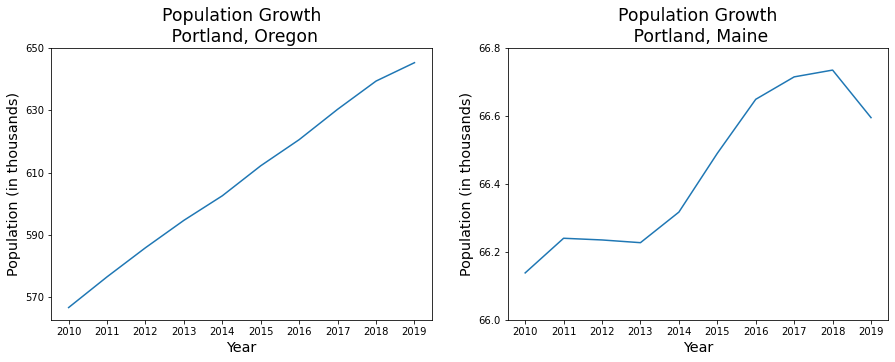

In [14]:
draw_growth_charts()

The age distribution of the populations is similar, skewing slightly younger in Portland, Maine.

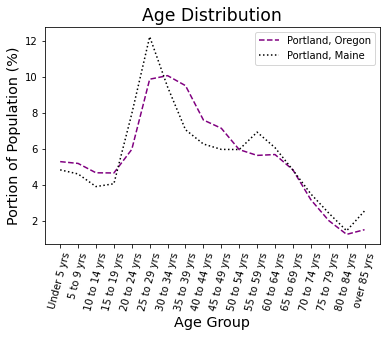

In [15]:
draw_age_chart()

Both Portlands have largely white populations, each over 75% white. Notably, Portland, Oregon, has a much higher Asian population, due to immigration from Asia. Portland, Maine, on the other had, has a higher proportion of Black or African American people, due to the prevalence of slavery and Oregon's history of segregation and discrimination. Portland, Oregon is slightly more diverse, with a larger population of people reporting their race as "Other" or "Multiple Races." Approximately 72% of the US population reports that their race is white.

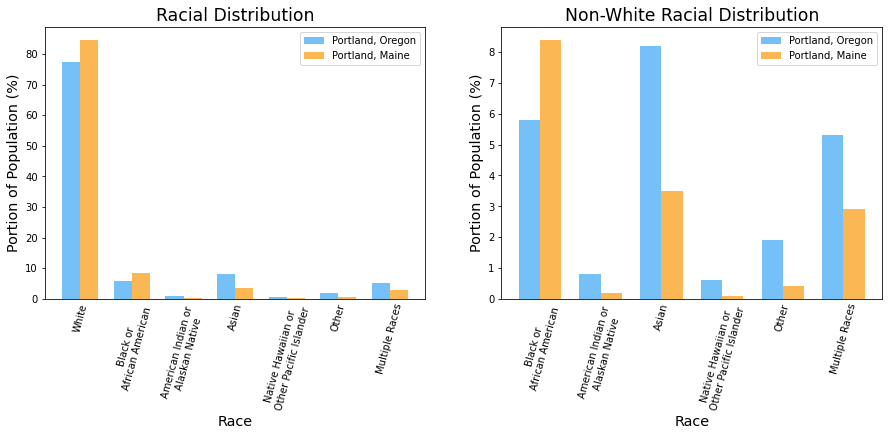

In [16]:
draw_race_charts()

The portion of the population reporting Hispanic or Latino heritage is approximately three times higher in Portland, Oregon, than in Portland, Maine. This is in line with the racial distribution above, with Portland, Oregon, being more diverse, but still less diverse than the overall US population. Approximately 18% of the US population reports Hispanic or Latino heritage.

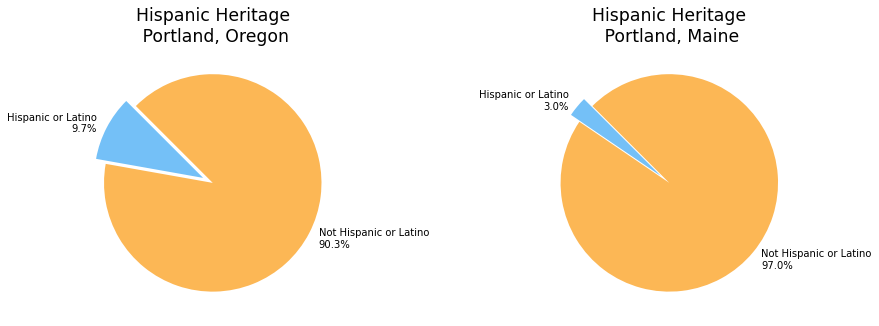

In [17]:
draw_heritage_charts()

In terms of education, the populations of both Portlands are approximately equal, with about half of the population of each city reporting having earned a Bachelor's degree, or higher. This is signifcantly higher than the national estimate of 33.1%.

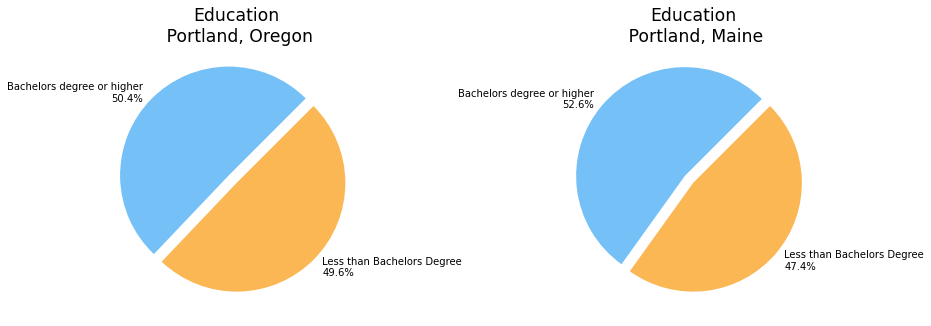

In [18]:
draw_education_charts()

The two Portlands are also largely equivalent in terms of poverty. Both cities report poverty rates of less than 15%. This is slightly higher than the national poverty rate of 10.1%

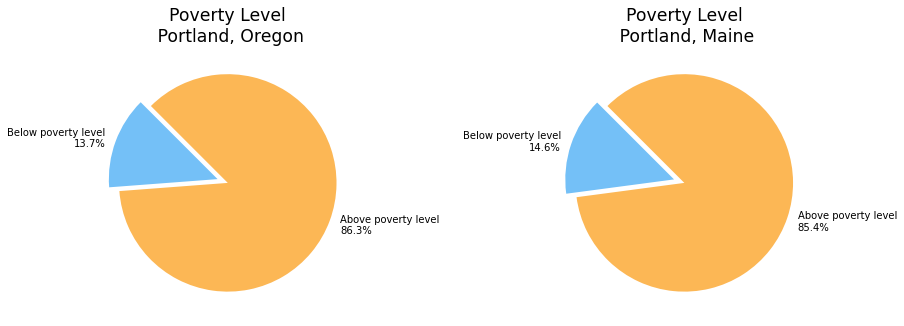

In [19]:
draw_poverty_charts()

### 4.2 Lifestyle

There are many restaurants in each city. The top five styles of restaurant are listed below. There are some differences between the two, but both have a variety of restaurants. The maps below show the locations of restaurants. Like most cities, there are are areas of more and less density.

In [20]:
# top 5 food
top5_food

,"Portland, Oregon","Portland, Maine"
Rank,,
1,Chinese Restaurant,American Restaurant
2,Mexican Restaurant,Italian Restaurant
3,American Restaurant,Seafood Restaurant
4,Thai Restaurant,Thai Restaurant
5,Sushi Restaurant,Restaurant


### Portland, Oregon

In [21]:
# Oregon map with restaurants
OR_map = folium.Map(location=[OR_latitude, OR_longitude], zoom_start=14)

# add markers to the map
for lat, lng, cat in zip(OR_restaurants['lat'], OR_restaurants['lng'], OR_restaurants['categories']):
    label = folium.Popup(cat)
    folium.Marker(
        [lat, lng],
        radius=5,
        popup=label
    ).add_to(OR_map)
    
OR_map

### Portland, Maine

In [22]:
# Maine map with restaurants
ME_map = folium.Map(location=[ME_latitude, ME_longitude], zoom_start=14)

# add markers to the map
for lat, lng, cat in zip(ME_restaurants['lat'], ME_restaurants['lng'], ME_restaurants['categories']):
    label = folium.Popup(cat)
    folium.Marker(
        [lat, lng],
        radius=5,
        popup=label
    ).add_to(ME_map)
    
ME_map

# 5. Conclusion

Both Portland, Oregon, and Portland, Maine, are surprisingly similar, despite their differences in size and location. The most obvious difference is size. Portland, Oregon is approximately ten times the size of Portland, Maine. In terms of demographics, the differences are smaller: diversity levels are similar, with Portland Oregon, being slightly more diverse, and levels of poverty and education attainment are almost identical. This leaves questions of lifestyle as the deciding factor for most people.
<br><br>
As a smaller city, Portland, Maine, is less densely populated than Portland, Oregon. If a person is seeking to move to a large city with many options and steady growth, Portland, Oregon is the clear choice. If a person wants to move to a smaller city, with less density, then Portland, Maine would be an excellent choice. 